<a href="https://colab.research.google.com/github/Fernanda-Mesa/Clase06_IA/blob/main/clase14IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Importar librerías**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

###**Creación de dataset**

In [25]:
def load_boston():
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return {'data': data, 'target': target, 'DESCR': 'boston dataset', 'feature_names': ['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']}

###**Cargar dataset "Boston" con SKLEARN**

In [26]:
data = load_boston()
print(data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [27]:
# Mostrar las claves del diccionario
data.keys()
print(data.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names'])


In [28]:
# Mostrar la descripción de los datos.
print(data['DESCR'])

boston dataset


In [29]:
# Las variables explicativas.
X = data['data']
header = data['feature_names']
print(header)
print(X)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [30]:
# La variable respuesta.
Y = data['target']
Y = Y.reshape(-1, 1)
print(Y)

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 [18.3]
 [21.2]
 [19.2]
 [20.4]
 [19.3]
 [22. ]
 [20.3]
 [20.5]
 [17.3]
 [18.8]


###**Convierte los datos en un DataFrame y luego explora:**


In [31]:
df = pd.DataFrame(np.append(X,Y,axis = 1))
df.columns = list(header)+['PRICE']
print(df)
print(df.columns)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [32]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [33]:
#
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [34]:
# Estadística descriptiva de las columnas. Descriptive statistics of the variables (columns).
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [35]:
# Matriz de correlación por pares.
np.round(df.corr(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


##**Matriz de Correlación por Pares**
La matriz de correlación por pares es una matriz que muestra los coeficientes de correlación entre todas las posibles combinaciones de un conjunto de variables. Cada celda en la matriz representa la correlación entre dos variables diferentes. La correlación mide la relación lineal entre dos variables, con valores que van desde -1 hasta 1:


*  1 indica una correlación positiva perfecta, donde las variables aumentan o disminuyen juntas.
*  0 indica que no hay correlación lineal entre las variables.
* -1 indica una correlación negativa perfecta, donde una variable aumenta mientras la otra disminuye.

##**Contexto y Uso**

En análisis de datos, la matriz de correlación es útil para identificar relaciones entre variables. Es comúnmente utilizada en estadística, ciencia de datos y aprendizaje automático para:

*  Detectar multicolinealidad.
*  Identificar relaciones lineales entre variables.
*  Seleccionar características en modelos predictivos.


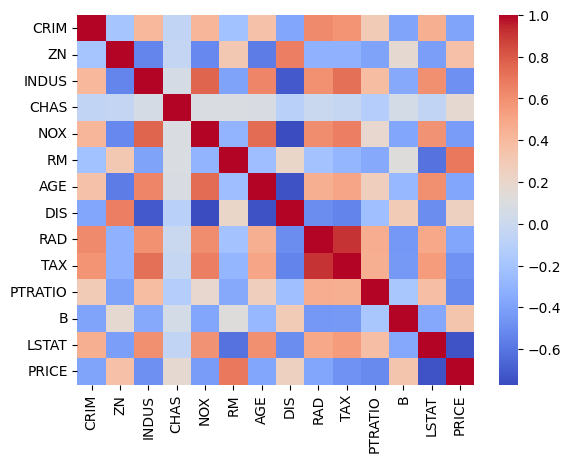

In [36]:
# Visualize the correlation matrix.
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

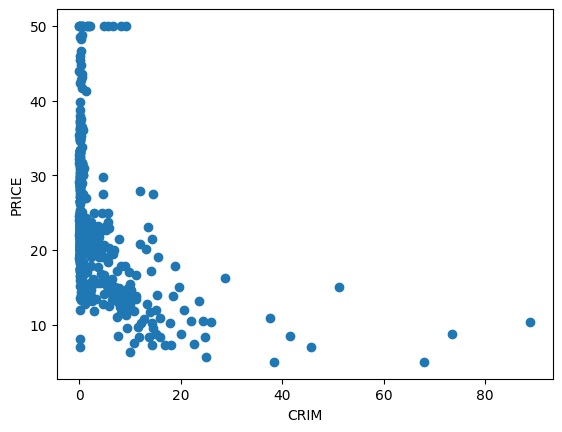

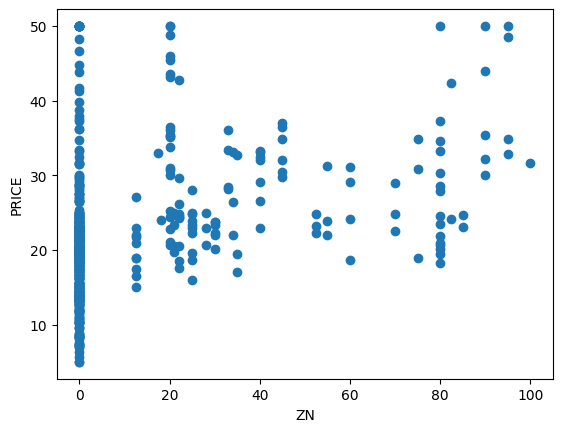

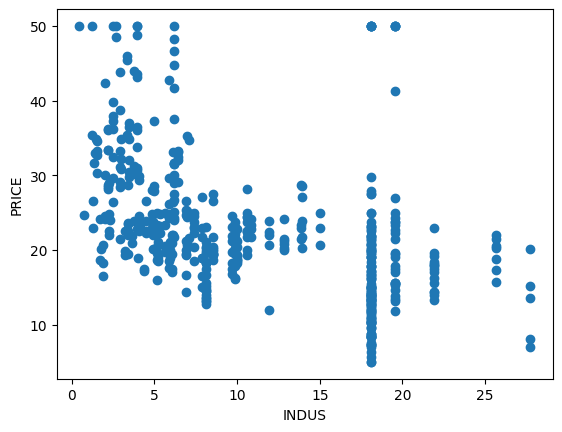

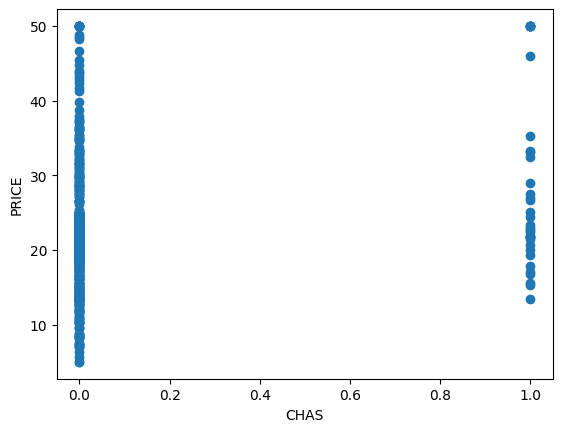

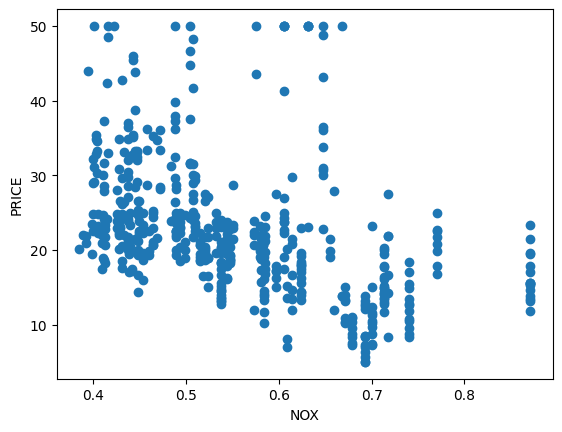

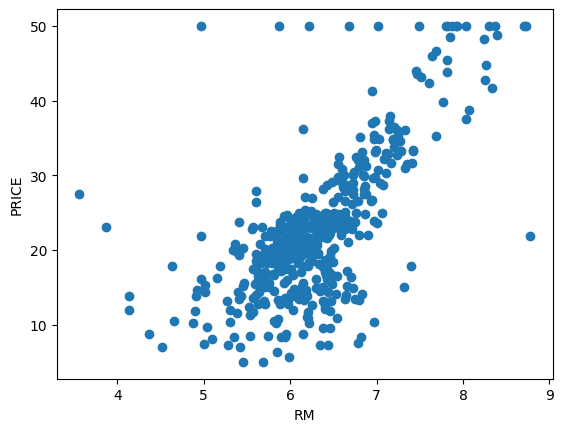

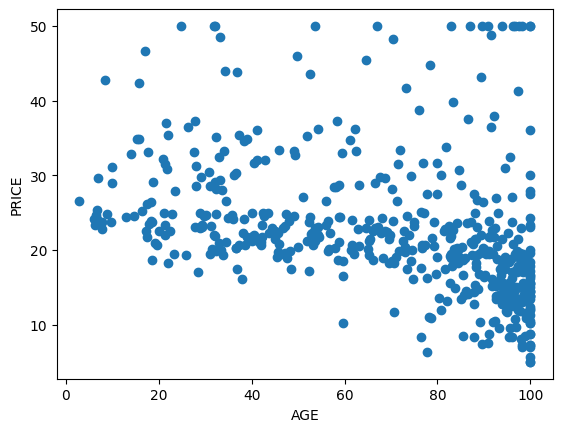

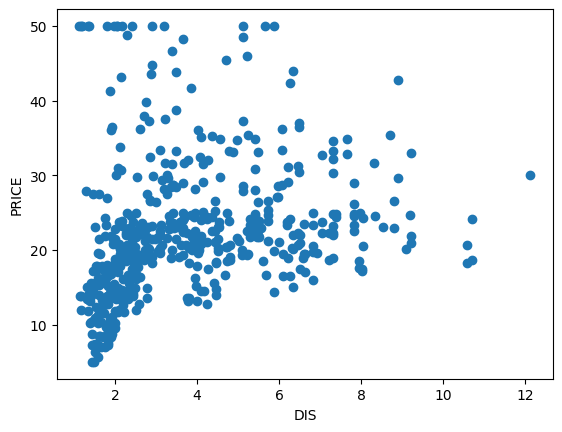

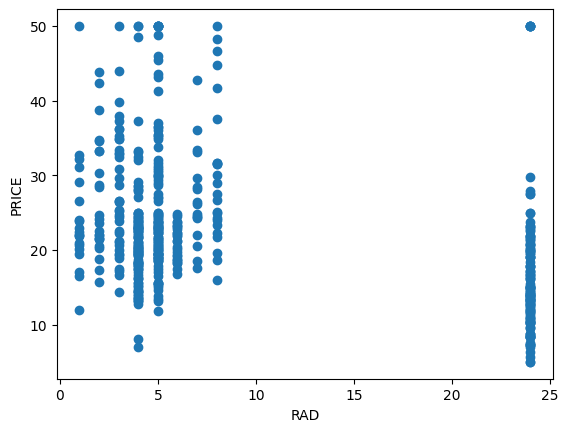

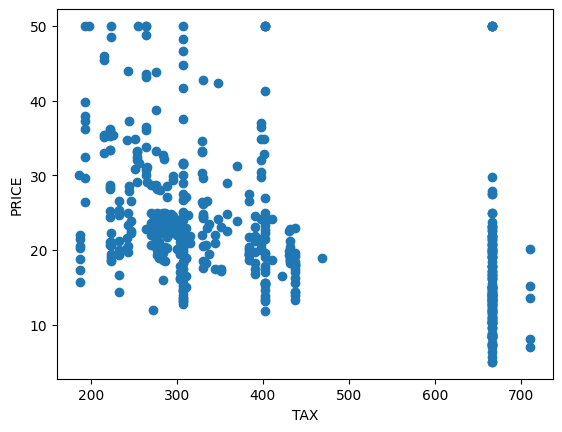

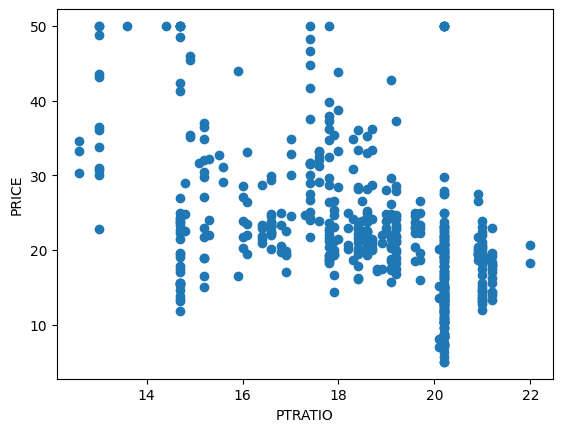

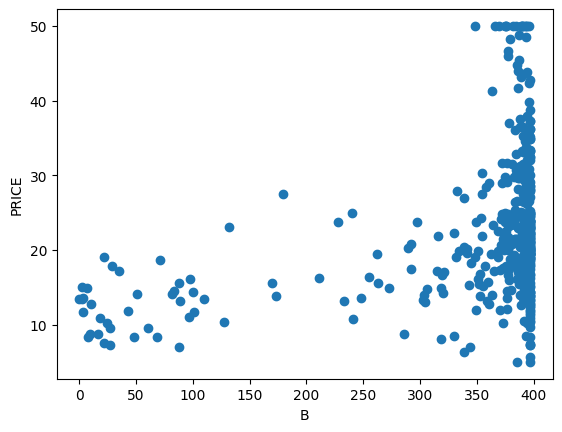

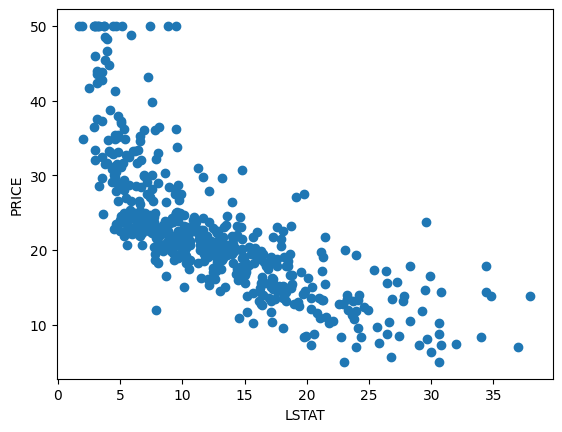

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
# Hacer grafico de todas las variables X en un ciclo for vs PRICE

for i in header:
    plt.scatter(df[i],df['PRICE'])
    plt.xlabel(i)
    plt.ylabel('PRICE')
    plt.show()

    # Este codigo tira error.
# for i in range(len(header)):
   # plt.scatter(X[:,i],y[:,0],c = 'g',s=15,alpha=0.5)
   # plt.xlabel(header[i])
   # plt.ylabel('PRICE')
   # plt.show()

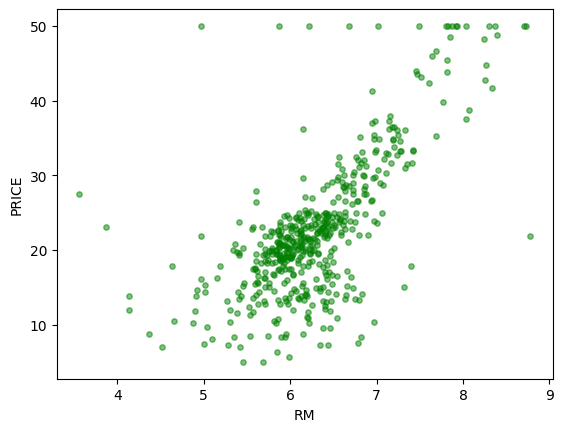

In [44]:
# Visualize RM vs PRICE.
plt.scatter(X[:,5],Y[:,0],c = 'g',s=15,alpha=0.5)
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()


###**1.3. Train by linear regression:**

El proceso es viendo los datos para hacer la regresión. Sin embargo, se necesita hacer el train test para tener una mejor relación.

In [45]:
# Instanciar la regresión lineal
lm = LinearRegression(fit_intercept=True)
# Train.
lm.fit(X,Y)

LinearRegression()

In [46]:
# The intercept.
lm.intercept_

array([36.45948839])

In [47]:
# The rest of coefficients (parameters).
lm.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [48]:
# Display the parameters as a DataFrame.
parametersDF = pd.DataFrame(lm.coef_,index=['Parameter Value'],columns=header)
parametersDF['Intercept'] = lm.intercept_[0]
parametersDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Intercept
Parameter Value,-0.108011,0.04642,0.020559,2.686734,-17.766611,3.809865,0.000692,-1.475567,0.306049,-0.012335,-0.952747,0.009312,-0.524758,36.459488


###**1.4. Diagnostics:**

In [49]:
# In-sample prediction. Predicción dentro de la muestra.
predY = lm.predict(X)  # Predicted Y.

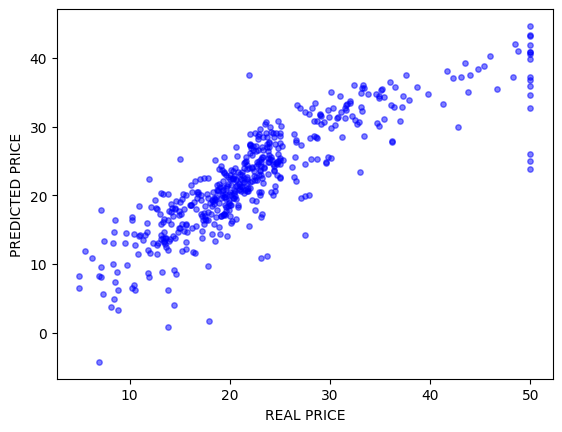

In [50]:
# Display real Y vs predicted Y.
plt.scatter(Y,predY,c = 'blue', s=15, alpha=0.5)
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show() # Da un valor bueno dada la predicción.

In [51]:
# Calculate the correlation between the real Y and predicted Y.
pd.Series(Y[:,0]).corr(pd.Series(predY[:,0]))

0.8606059865637758

In [52]:
# Coefficient of determination (R^2):
lm.score(X,Y)

0.7406426641094095

###**1.5. In-sample and out-of-sample testing:**

In [53]:
# Split the dataset.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


Lo que sigue es el formato oficial. Para dividir los datos y despues hacer la metrica.

In [54]:
# predY_in = in-sample prediction of Y.
# predY_out = out-of-sample prediction of Y.
lm = LinearRegression()
lm.fit(X_train,Y_train)
Y_pred_train = lm.predict(X_train)
Y_pred_test = lm.predict(X_test)

In [55]:
print(Y_pred_train)
print(Y_pred_test)

[[34.31374606]
 [28.04878905]
 [27.17379274]
 [18.83965342]
 [18.8455841 ]
 [33.41039982]
 [28.84799259]
 [20.96821154]
 [20.27259551]
 [27.09810433]
 [37.79443228]
 [ 1.46076902]
 [13.82458897]
 [44.02975567]
 [18.83735826]
 [35.72172285]
 [22.99819392]
 [ 9.08154924]
 [31.47332272]
 [24.34127904]
 [28.8230485 ]
 [32.39638225]
 [42.50296307]
 [33.93337775]
 [21.59149757]
 [30.74675003]
 [19.77775894]
 [23.97486592]
 [29.54940164]
 [21.10526074]
 [36.3696983 ]
 [26.06936162]
 [21.56092941]
 [34.55065372]
 [35.49421508]
 [22.72208311]
 [31.05325527]
 [24.56897343]
 [27.75797143]
 [21.12522386]
 [15.05847969]
 [27.21907747]
 [11.37870163]
 [ 9.21580279]
 [10.99395079]
 [22.7012768 ]
 [34.14855301]
 [26.7513361 ]
 [25.31775098]
 [20.04882155]
 [20.7967333 ]
 [12.02251252]
 [16.65257597]
 [29.50056241]
 [26.81596201]
 [17.80283925]
 [16.19122145]
 [33.95448131]
 [22.65567146]
 [17.95517492]
 [21.37525363]
 [21.50934135]
 [17.36009555]
 [33.81436552]
 [20.12207947]
 [19.92176409]
 [21.88551

In [56]:
print(Y_train)
print(Y_test)

[[35.2]
 [25. ]
 [36.2]
 [16.1]
 [10.9]
 [36.4]
 [25. ]
 [20.1]
 [16.8]
 [23.7]
 [42.3]
 [17.9]
 [12.7]
 [50. ]
 [18.4]
 [33.4]
 [22.9]
 [14.6]
 [29.9]
 [22.6]
 [22.5]
 [29. ]
 [50. ]
 [37.9]
 [21.4]
 [29.4]
 [20.3]
 [23. ]
 [30.1]
 [21.7]
 [36.5]
 [25. ]
 [24.5]
 [37.3]
 [33.8]
 [24.7]
 [32.7]
 [23.1]
 [25.1]
 [21.7]
 [13.4]
 [24.8]
 [12.7]
 [11.8]
 [ 8.3]
 [20.2]
 [41.3]
 [23.2]
 [23.1]
 [24.3]
 [19.3]
 [10.8]
 [18.6]
 [29. ]
 [23.9]
 [19.5]
 [13.1]
 [31.7]
 [21. ]
 [18.2]
 [21. ]
 [21.2]
 [14.1]
 [33.2]
 [13.8]
 [19.9]
 [21.7]
 [20.6]
 [21.2]
 [13.6]
 [18.9]
 [18. ]
 [24.1]
 [28.7]
 [23.4]
 [15.2]
 [23.6]
 [13.8]
 [11.7]
 [16.3]
 [50. ]
 [13.5]
 [50. ]
 [31.5]
 [22.6]
 [12.1]
 [21.7]
 [14.1]
 [22.4]
 [13.4]
 [33.1]
 [20.6]
 [ 8.3]
 [36.2]
 [ 6.3]
 [21.5]
 [23.3]
 [24. ]
 [19.1]
 [29.6]
 [27.9]
 [16.2]
 [ 9.5]
 [24.6]
 [15.6]
 [ 8.1]
 [15.3]
 [19. ]
 [22. ]
 [28. ]
 [19.2]
 [14.5]
 [ 9.7]
 [30.7]
 [20.6]
 [16. ]
 [19.8]
 [17.8]
 [21.2]
 [28.7]
 [41.7]
 [ 7.2]
 [13.4]
 [17.7]
 [26.7]


In [57]:
print(lm)

LinearRegression()


In [58]:
print('In-sample MSE is      : ' + str(metrics.mean_squared_error(Y_train, Y_pred_train)))
print('Out-of-sample MSE is  : ' + str(metrics.mean_squared_error(Y_test, Y_pred_test)))
print('-'*50)
print('In-sample RMSE is     : ' + str(np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))))
print('Out-of-sample RMSE is : ' + str(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))))

In-sample MSE is      : 20.184336639873152
Out-of-sample MSE is  : 28.40585481050824
--------------------------------------------------
In-sample RMSE is     : 4.492698146979513
Out-of-sample RMSE is : 5.329714327288869


# **Explicación:**

Este fragmento de código evalúa el rendimiento de un modelo de aprendizaje automático comparando los valores predichos con los valores reales, tanto para el conjunto de datos de entrenamiento (dentro de la muestra) como para el conjunto de datos de prueba (fuera de la muestra).

### **1. Error Cuadrático Medio (MSE):**

* **Dentro de la muestra (In-sample MSE):** Se calcula utilizando los datos de entrenamiento (Y_train) y las predicciones correspondientes (Y_pred_train). Esto mide el error promedio de las predicciones dentro del conjunto de entrenamiento.

* **Fuera de la muestra (Out-of-sample MSE):** Se calcula utilizando los datos de prueba (Y_test) y las predicciones correspondientes (Y_pred_test). Esto mide el error promedio de las predicciones en el conjunto de prueba, evaluando la capacidad del modelo para generalizar a datos nuevos.

### **2 . Raíz del Error Cuadrático Medio (RMSE):**

* **Dentro de la muestra (In-sample RMSE):** Es la raíz cuadrada del MSE dentro de la muestra. Proporciona una medida del error en las mismas unidades que la variable objetivo, lo que puede ser más interpretable que el MSE.

* **Fuera de la muestra (Out-of-sample RMSE):** Es la raíz cuadrada del MSE fuera de la muestra, proporcionando una medida similar para el conjunto de prueba.

# **Contexto**

Cuando entrenas un modelo de aprendizaje automático, se suelen utilizar dos conjuntos de datos:

* **Conjunto de entrenamiento:** Utilizado para ajustar el modelo.

* **Conjunto de prueba:** Utilizado para evaluar qué tan bien el modelo generaliza a datos nuevos.

# **Valores Proporcionados**

###**In-sample MSE (Error Cuadrático Medio dentro de la muestra):**

* **Valor:** 20.184336639873152

* **Interpretación:** Este valor indica el error promedio que comete el modelo al predecir los datos dentro del conjunto de entrenamiento. Un valor más bajo significa que el modelo ajusta bien los datos de entrenamiento.

###**Out-of-sample MSE (Error Cuadrático Medio fuera de la muestra):**

* **Valor:** 28.40585481050845

* **Interpretación:** Este valor muestra el error promedio del modelo al predecir los datos en el conjunto de prueba. Este valor es generalmente más alto que el MSE dentro de la muestra porque el modelo está prediciendo sobre datos que no ha visto antes. Si este valor es significativamente mayor que el MSE dentro de la muestra, puede indicar que el modelo podría estar sobreajustado (overfitted).

###**In-sample RMSE (Raíz del Error Cuadrático Medio dentro de la muestra):**

* **Valor:** 4.492698146979513

* **Interpretación:** Es la raíz cuadrada del MSE dentro de la muestra. Proporciona el error en las mismas unidades que la variable objetivo, lo que puede ser más fácil de interpretar. Un valor más bajo significa que el modelo es más preciso con los datos de entrenamiento.

###**Out-of-sample RMSE (Raíz del Error Cuadrático Medio fuera de la muestra):**

**Valor:** 5.3297143272888885

**Interpretación:** Es la raíz cuadrada del MSE fuera de la muestra. Este valor también está en las mismas unidades que la variable objetivo y, al ser mayor que el RMSE dentro de la muestra, sugiere que el modelo tiene más error al predecir sobre datos nuevos.

# **Resumen General**

* **MSE y RMSE** más bajos indican un mejor rendimiento del modelo.

* En este caso, los valores de error fuera de la muestra (tanto MSE como RMSE) son mayores que los valores dentro de la muestra, lo que es esperado. Sin embargo, la diferencia no es drástica, lo que sugiere que el modelo generaliza razonablemente bien.
* Si la diferencia fuera mayor, podríamos sospechar que el modelo está sobreajustado a los datos de entrenamiento.

# **Análisis de Residuales en Regresión Lineal**

El análisis de residuales es una parte fundamental de la evaluación de un modelo de regresión lineal (RL). Los residuales son las diferencias entre los valores observados y los valores predichos por el modelo. Al analizar los residuales, puedes obtener información sobre el ajuste del modelo y detectar posibles problemas que podrían afectar su interpretación y validez.

**¿Qué son los residuales?**

Los residuales (o errores) se calculan como:

\begin{equation}
Residual = Y_{observado} - Y_{predicho}
\end{equation}

Donde:
* Y_observado es el valor real o observado de la variable dependiente.
* Y_predicho es el valor predicho por el modelo de regresión.

# **Objetivos del Análisis de Residuales**

##**El análisis de residuales tiene varios objetivos:**

**1. Verificar la linealidad:** Los residuales deben estar distribuidos de manera aleatoria alrededor de cero, lo que indica que la relación entre las variables independientes y dependientes es lineal.

**2. Evaluar la homocedasticidad:** Esto significa que la varianza de los residuales debe ser constante a lo largo de todos los niveles de la variable independiente. Si no es así (es decir, si hay heterocedasticidad), puede haber problemas con el modelo.

**3. Detectar normalidad:** Los residuales deben seguir una distribución normal. Si no lo hacen, podría afectar la validez de las pruebas estadísticas.

**4. Identificar puntos atípicos:** Los residuales muy grandes pueden indicar la presencia de outliers o puntos atípicos que podrían influir de manera desproporcionada en el modelo.

**5. Detección de autocorrelación:** En el contexto de series temporales o datos ordenados, se verifica si los residuales están correlacionados entre sí, lo que podría indicar que el modelo no ha capturado alguna estructura en los datos.

##**Métodos Comunes de Análisis de Residuales**

**1. Gráfico de Residuales vs. Valores Ajustados:** Este gráfico muestra los residuales en el eje y y los valores predichos en el eje x. Deberías observar una dispersión aleatoria sin patrones claros.

* **Patrón en forma de U o arco:** Indica que la relación entre las variables podría no ser lineal.

* **Patrón en embudo:** Sugiere heterocedasticidad.

**2. Gráfico Q-Q (Quantile-Quantile):** Este gráfico compara la distribución de los residuales con una distribución normal teórica. Si los residuales son normales, los puntos deberían alinearse en una línea recta.

* **Desviaciones significativas de la línea:** Indican que los residuales no son normales.

**3. Histograma de los Residuales:** Un histograma te permite visualizar la distribución de los residuales. Debería aproximarse a una campana simétrica (distribución normal).

* **Sesgo en un lado:** Puede indicar problemas de normalidad.

**4. Durbin-Watson:** Una prueba estadística utilizada para detectar la autocorrelación en los residuales de un modelo de regresión.

**¿Qué hacer si encuentras problemas?**

* **Linealidad:** Si los residuales muestran un patrón no lineal, podrías considerar transformar las variables o usar un modelo no lineal.

* **Heterocedasticidad:** Si detectas heterocedasticidad, podrías probar transformar la variable dependiente, usar métodos robustos a la heterocedasticidad, o emplear un modelo de regresión ponderada.

* **Normalidad:** Si los residuales no son normales, podrías considerar transformaciones de las variables o utilizar métodos que no asuman normalidad, como la regresión cuantílica.

* **Outliers:** Identificar y analizar los outliers para decidir si se deben eliminar, o si debes ajustar el modelo para considerar su impacto.

* **Autocorrelación:** Si los residuales están autocorrelacionados, podrías necesitar un modelo más complejo, como una regresión con términos de autoregresión o modelos de series temporales.

###**1.6. Residual analysis:**

In [59]:
# Calculate residual.
residual = Y_train - Y_pred_train

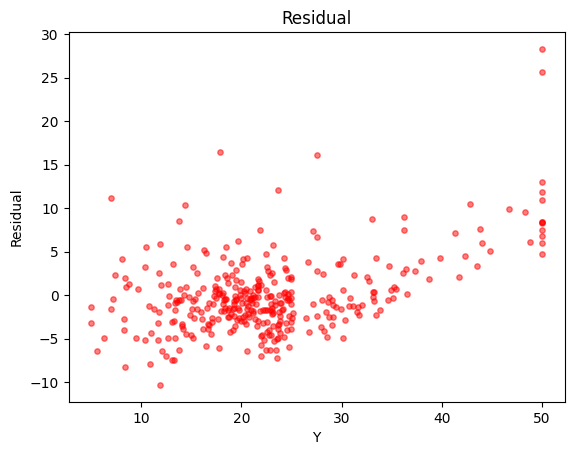

In [60]:
# Q: Can you check "visually" that the mean = 0 and variance = constant?
plt.scatter(Y_train,residual,c = 'red', s=15, alpha=0.5)
plt.xlabel('Y')
plt.ylabel('Residual')
plt.title('Residual')
plt.show()

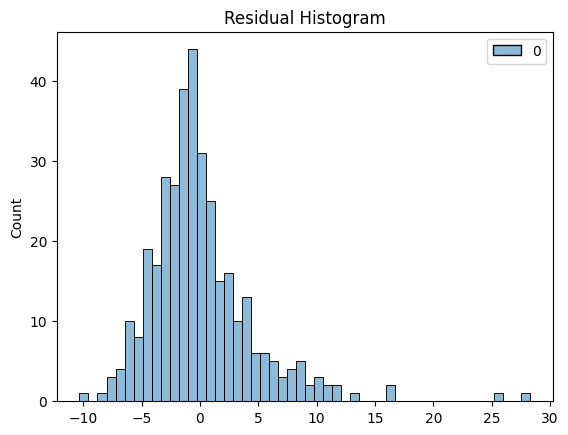

In [61]:
# Q: Are the residuals normally distributed centered around 0?
sns.histplot(residual, bins=50, color='green').set_title("Residual Histogram")
plt.show()

###**1.7. Given a new set of values for the explanatory variables, predict the response:**

CRIM : 0.03 \\
ZN : 0.0 \\
INDUS : 13.0 \\
CHAS : 0.0 \\
NOX : 0.4 \\
RM : 4.3 \\
AGE : 23.5 \\
DIS : 1.9 \\
RAD : 1.0 \\
TAX : 273.0 \\
PTRATIO : 18.0 \\
B : 380.0 \\
LSTAT : 7.5 \\


In [62]:
X_new = np.array([0.03, 0.0, 13.0, 0.0, 0.4, 4.3, 23.5, 1.9, 1.0, 273.0, 18.0, 380.0, 7.5]).reshape(1,-1)  # Reshaped as a row.
Y_pred_new = lm.predict(X_new)  # Predicted price.
print(np.round(Y_pred_new[0,0],3))  # Predicted price of the house.

20.594


###**APLICACIÓN DE UN MODELO DE APRENDIZAJE SUPERVISADO.**
Se tienen distintos tipos de modelos de clasificación, con esto se puede usar algoritmos para poder determinar imagenes, si son perros, gatos, etc. Para esto se pueden usar redes neuronales. (Cap 05 unidad 03)

Se no se trata de texto puede usarse knn. Para hacer clasificaciones con machine learning se hace con un tipo discreto o nominal con la variable que se quiera, utilizandose en eventos cotidianos.

**KNN chart+** puede ir agrupando datos en una figura con colores que permite hacer una agrupación de datos.

**Naive_bayes_...** Permite clasificar correos spam con este tipo de codigo.

La **regresión logistica** es un metodo que permite evaluar la probabilidad de unos datos con una grafica similar a una integral alargada, dando con los datos en lo alto y bajo de la integral.

---

La redes neuronales es un metodo insprado en las neuronas del ser humano, evaluado con una entrada, media y salida de datos.
**Random Fores, Pros, Cons**

###**Nuevo ejemplo de datos y regresión**
# **Clasificación con regresión Logística.**


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [67]:
data = load_breast_cancer() # DATOS DE CANCER

In [68]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [69]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [74]:
X = data.data
y = data.target

In [75]:
X.shape

(569, 30)

In [71]:
# Variable de respuesta.
# Vuelva a etiquetar de modo que 0 = 'benigno' y 1 = maligno.
Y = 1 - data['target']
label = list(data['target_names'])
label.reverse()
print(label)

['benign', 'malignant']


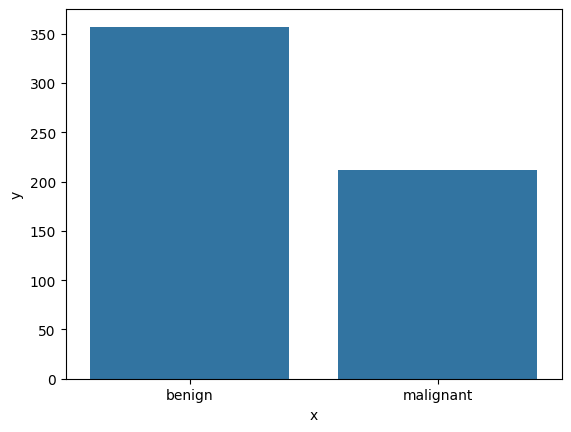

In [72]:
# Visualizar la frecuencia.
ser = pd.Series(Y)
table = ser.value_counts()
table = table.sort_index()         # Debe ordenarse para un etiquetado correcto.
raw_data = {'x': label, 'y': table.values}
sns.barplot(x='x', y='y', data=raw_data)
plt.show()

La idea es llegar a un modelo que prediga mi respuesta (que ya se). Con los datos de entrenamiento y testeo. Así exportar el modelo para usarlo con otros datos en el futuro.

###**Test y Train split**

In [76]:
# Esto hace el split de forma random, y al tener una semilla se pued comparar.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1234)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(341, 30)
(228, 30)
(341,)
(228,)


In [83]:
# Entrenar y predecir.
LL = LogisticRegression(solver='liblinear',max_iter=200)
LL.fit(X_train,y_train)
Y_pred_test = LL.predict(X_test) # Predicción fuera de la muestra.
print(Y_pred_test)

[1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1
 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 0 1 0 1 0]


In [79]:
# Regresión lineal. Ajusta el modelo con los datos de prueba.
LL = LogisticRegression(solver='liblinear',max_iter=200)
LL.fit(X_train,y_train) # Entrenamiento

LogisticRegression(max_iter=200, solver='liblinear')

In [82]:
predY = LL.predict(X_test) # Predicción fuera de la muestra.
print(predY)

[1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1
 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 0 1 0 1 0]


In [107]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(y_test,Y_pred_test)
print(conf_mat)

[[ 72  12]
 [  5 139]]


In [105]:
# Matrix de confusión
print(metrics.confusion_matrix(y_test,predY))

[[ 72  12]
 [  5 139]]


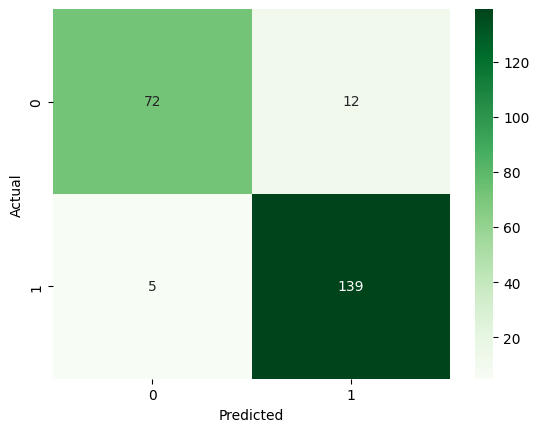

In [91]:
# Visualizar matriz de confusión
sns.heatmap(metrics.confusion_matrix(y_test,predY),annot=True,cmap='Greens',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Los colores fuertes son los que acerte de los benignos (rosado) y malignos (blanco) y los otros digonales son errores.
# Por que si había menos malignos ahora hay mas.
# Acuraci es bueno. Porque nos predice la diagonal. Los datos medico idealmente se miden con sensibilidad.

Esta erroneo. ?

In [94]:
acuraci = (139+72)/(139+12+5+72)
print(acuraci)

0.9254385964912281


In [108]:
precison = (72/(72+12))
print(precison) #nos damos cuenta de que baja un monton.

0.8571428571428571


In [109]:
error_rate = (12+5)/(139+72+12+5)
print(error_rate) #El error esta dando mayor al 5% por lo que es bastante malo el modelo.

0.07456140350877193


<Axes: >

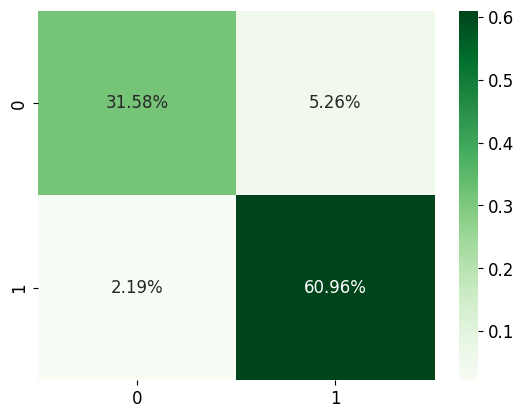

In [111]:
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True,
            fmt='.2%', cmap='Greens')

<Axes: >

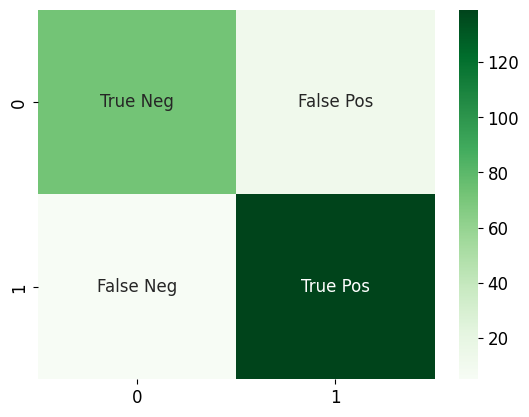

In [112]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(metrics.confusion_matrix(y_test,predY),annot=labels,cmap='Greens',fmt='')

<Axes: >

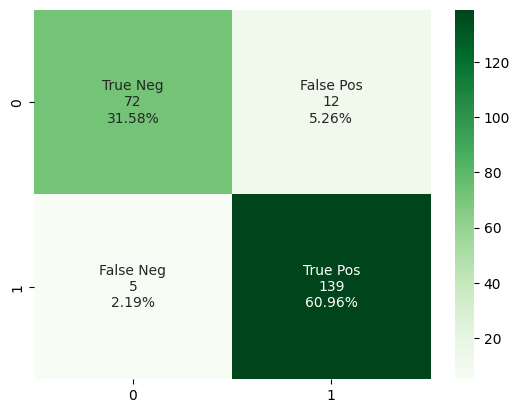

In [93]:
group = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                metrics.confusion_matrix(y_test,predY).flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     metrics.confusion_matrix(y_test,predY).flatten()/np.sum(metrics.confusion_matrix(y_test,predY))]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(metrics.confusion_matrix(y_test,predY),annot=labels,cmap='Greens',fmt='')

Esto debería ser al reves.

In [113]:
# Accuracy, Sensitivity, Specificity y Precision usando la confusion matrix.
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])

In [114]:
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.925
Sensitvity  = 0.965
Specificity = 0.857
Precision   = 0.921


In [117]:
# Alternativa.
accuracy = metrics.accuracy_score(y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
sensitivity = metrics.recall_score(y_test,Y_pred_test)
precision = metrics.precision_score(y_test,Y_pred_test)

In [118]:
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.925
Sensitvity  = 0.965
Precision   = 0.921


### **Límite de corte (umbral):**

In [119]:
# Ahora, prediga la probabilidad de Y = 1.
Y_pred_test_prob=LL.predict_proba(X_test)[:,1]

In [121]:
# Se puede cambiar el valor de corte a voluntad
cutoff = 0.7 # el valor de corte puede ser un valor entre 0 y 1.
Y_pred_test_val = (Y_pred_test_prob > cutoff).astype(int)
conf_mat = metrics.confusion_matrix(y_test,Y_pred_test_val)
print(conf_mat)

[[ 77   7]
 [  6 138]]


In [122]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])

In [123]:
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.943
Sensitvity  = 0.958
Specificity = 0.917
Precision   = 0.952


## **Curva ROC**

In [124]:
# Initialize. Modelo clase.
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []                                                   # True Positive Rate.
FPR = []

In [126]:
# Populate the TP and FP lists.
for cutoff in cutoff_grid:
    Y_pred_test_val = (Y_pred_test_prob > cutoff).astype(int)
    conf_mat = metrics.confusion_matrix(y_test,Y_pred_test_val)
    sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    TPR.append(sensitivity)
    FPR.append(1-specificity)

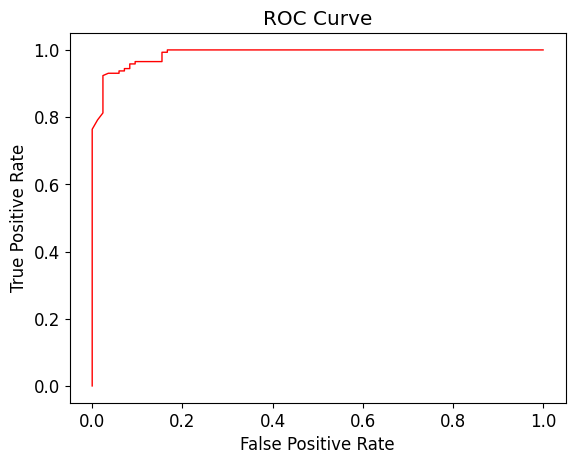

In [128]:
# Visualizar.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

UNA CURVA BUENA ES CERCANA AL 80% ARRIBA DEL 75% Y BAJO DEL 75% SON MALAS.

In [130]:
# Calculate the TPR and FPR using a Scikit Learn function.
FPR, TPR, cutoffs = metrics.roc_curve(y_test,Y_pred_test_prob,pos_label=1)      # positive label = 1.

In [132]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predY)

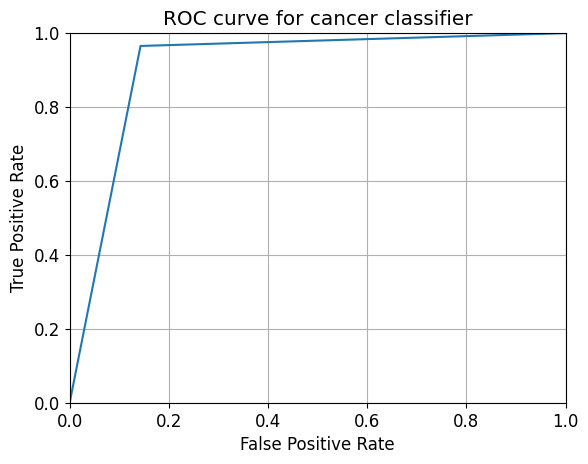

In [133]:
# ROC Curve. Modelo propio de colab. Cuál es la diferencia con el que sigue?
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for cancer classifier')
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#sin embargo, no es un buen modelo de predicción para este procedimiento.

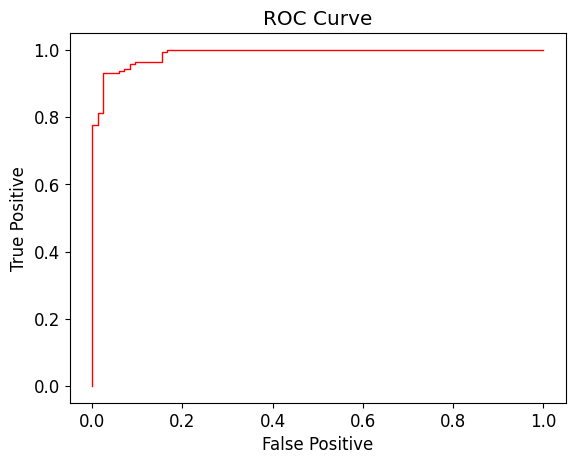

In [134]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [136]:
# AUC.
auc = metrics.roc_auc_score(y_test,Y_pred_test_prob)
print('AUC  = {}'.format(np.round(auc,3)))

AUC  = 0.989


In [138]:
# Caso anterior
print(metrics.roc_auc_score(y_test, Y_pred_test))

0.9112103174603174
